Experiment 1 (CartPole):

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

%matplotlib inline

2022-09-27 16:15:05.223456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


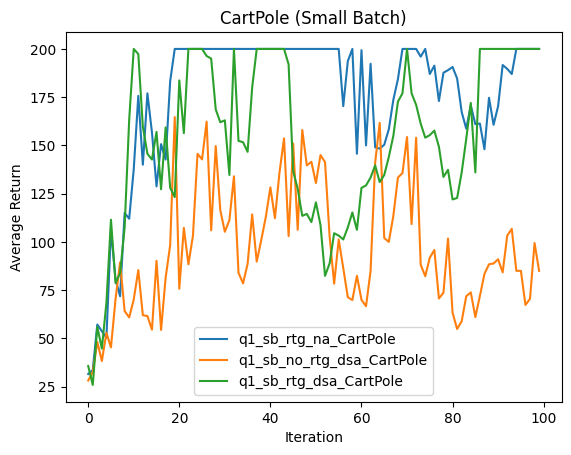

In [2]:
rename = {"sb": "Small Batch", "lb": "Large Batch", "InvertedPendulum": "Inverted Pendulum"}

def gen_plot(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q2_pg_")[1].split("-v0")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        ttl1 = file.split("-v0")[0].split("_")[-1].split(".")[0]
        ttl1 = rename.get(ttl1, ttl1)
        ttl2 = lbl.split('_')[1]
        ttl2 = rename.get(ttl2, ttl2)
        # print(ttl1, ttl2)
        if ttl1 != ttl2: ttl1 += f" ({ttl2})"
        plt.title(ttl1)
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot("q2_pg_q1_sb")

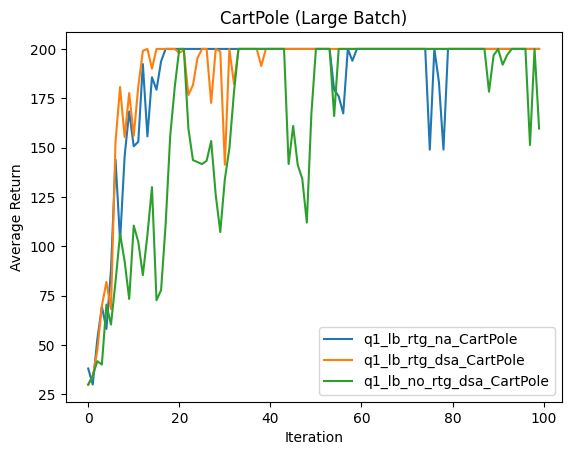

In [3]:
gen_plot("q2_pg_q1_lb")

Generating commands lol:

In [13]:
# InvertedPendulum Generation

s = lambda b, r: f"""python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \\\n--ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b {b} -lr {r} -rtg \\\n--exp_name q2_b{b}_r{''.join(str(r).split('.'))}_rtg_dsa\n"""

for b in [100, 200, 300]:
    for r in [0.05, 0.075, 0.1]:
        print(s(b, r))


python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \
--ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 100 -lr 0.05 -rtg \
--exp_name q2_b100_r005_rtg_dsa

python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \
--ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 100 -lr 0.075 -rtg \
--exp_name q2_b100_r0075_rtg_dsa

python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \
--ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 100 -lr 0.1 -rtg \
--exp_name q2_b100_r01_rtg_dsa

python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \
--ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 200 -lr 0.05 -rtg \
--exp_name q2_b200_r005_rtg_dsa

python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \
--ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 200 -lr 0.075 -rtg \
--exp_name q2_b200_r0075_rtg_dsa

python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 \
--ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 200 -lr 0.1 -rtg \
--exp_name q2_b200_r01_r

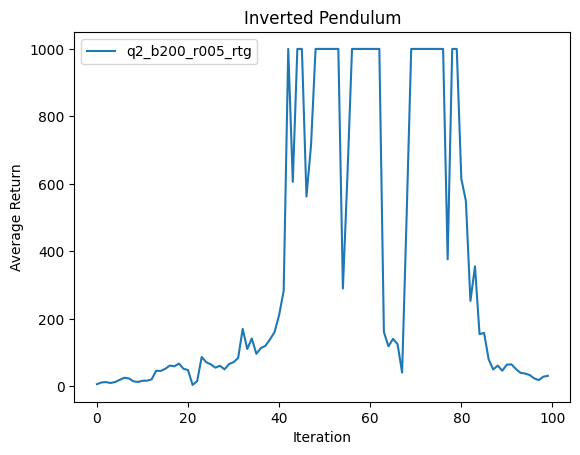

In [24]:
def gen_plot_ip(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q2_pg_")[1].split("_dsa_InvertedPendulum-v4")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("Inverted Pendulum")
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_ip("q2_pg_q2_b200_r005_rtg_dsa_InvertedPendulum-v4_27-09-2022_17-02-04")

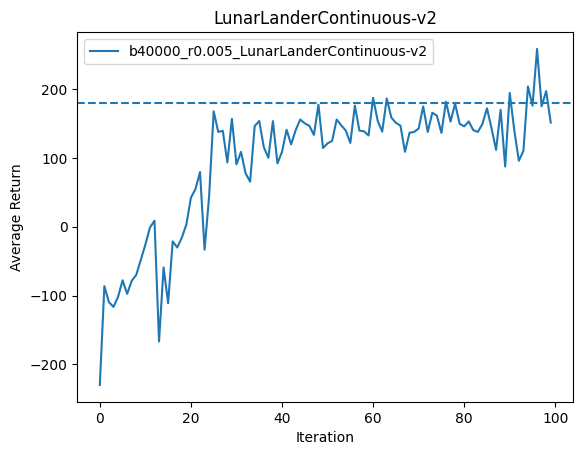

In [30]:
def gen_plot_lunar(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q3_")[1].split("_27")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("LunarLanderContinuous-v2")
    plt.axhline(180, linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_lunar("q2_pg_q3")

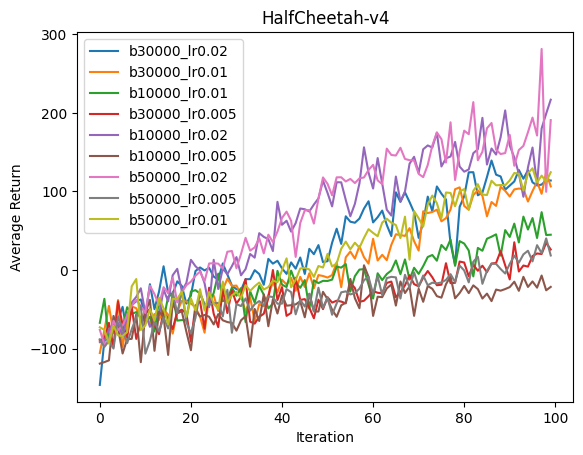

In [34]:
def gen_plot_cheetah(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q4_search_")[1].split("_rtg")[0]#.split("_27")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("HalfCheetah-v4")
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_cheetah("q2_pg_q4")

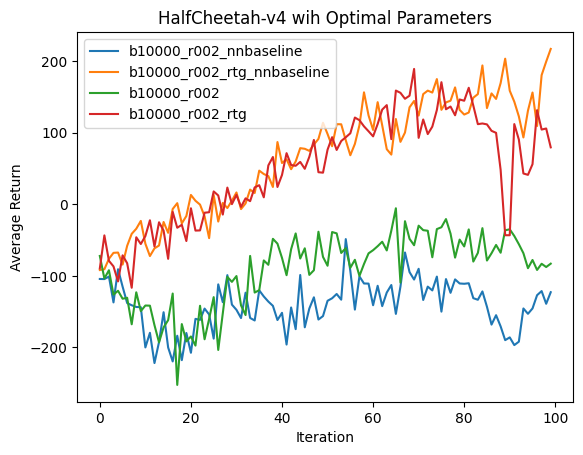

In [37]:
def gen_plot_cheetah_best(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q4_")[1].split("_HalfCheetah")[0]#.split("_27")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("HalfCheetah-v4 wih Optimal Parameters")
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_cheetah_best("q2_pg_q4_b")

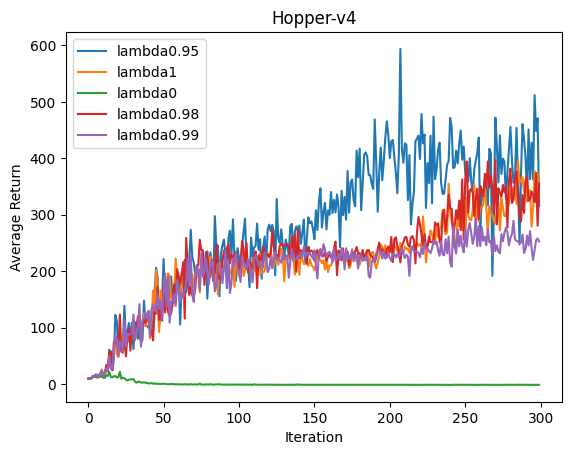

In [38]:
def gen_plot_gae(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split(".001_")[1].split("_Hopper-v4")[0]#.split("_27")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("Hopper-v4")
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_gae("q2_pg_q5")